In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


In [80]:
def SqLeast(x,y,m, alpha=0):
    global G, Phi
    Phi=np.array([x**k for k in range(0,m)]).T    
    G=Phi.T@Phi+np.eye(m) *alpha
    z=Phi.T@y
    return np.linalg.solve(G,z)

In [52]:
def AppError (x,y, Coefs):
    
    m = len(Coefs)-1
    PolynomValue=np.sum(np.array([Coefs[i]*x**i for i in range(0,m+1)]), axis=0) 
    
    y_av=np.average(y) #average of y value разве нет математической функции??
    y_disp=np.std(y)**2 #variage of y
    yv_disp=np.std(PolynomValue)**2 #variance of approximator
    
    ResLocal = (y-PolynomValue) # residal vector
    ResLocalRel  = ResLocal/np.std(y)
    
    MSE =mean_squared_error(y,PolynomValue)  #mean squared error
    SE=MSE**0.5# standart error
    SErel=SE/y_disp**0.5 #relative standart error

    TSS = np.sum((y-y_av)**2) # total sum of squares
    RSS = np.sum((ResLocal)**2) # residual sum of squares
    RSE = (RSS/(len(x)-m))**0.5
    
    R2 = (TSS-RSS)/TSS
    R22 = yv_disp/y_disp
    
    return ResLocal, SE, SErel, R2

## формирование набор данных

In [53]:
xleft = 0.0
xright = 2.0
n = 24
x_array = np.linspace(xleft,xright,n)

In [64]:
m=10
coefs=np.zeros(m)
coefs[0]=-1
coefs[-1]=1
coefs

array([-1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.])

In [66]:
yf_array=np.sum(np.array([coefs[i]*x_array**i for i in range(0,m)]), axis=0)
Delta = 0.01 * np.random.randn(len(x_array))
y_array = yf_array + Delta

## МНК без регуляризации

61745035308402.61


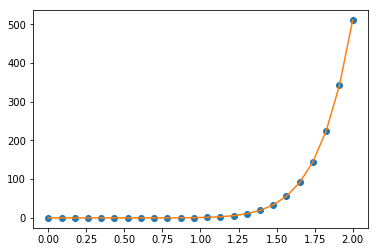

510.98640528390956 510.98552320561646


In [81]:
PolynomCoefs = SqLeast (x_array, y_array, m)
#print ('Коэффициенты МНК', PolynomCoefs)
cond = np.linalg.cond (G)
print (cond)
PolynomValue=   np.sum(np.array([PolynomCoefs[i]*x_array**i for i in range(0,m)]), axis=0)  
plt.plot (x_array, y_array, 'o')
plt.plot (x_array, PolynomValue)
plt.show()
print(PolynomValue[-1],  y_array[-1])

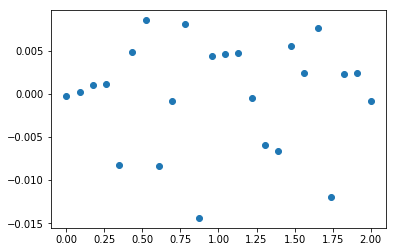

0.006138568437926489


In [82]:
ResLocal, SE, SErel, R2=AppError(x_array, y_array,PolynomCoefs )
plt.plot(x_array, ResLocal,'o')
plt.show()
print(SE)

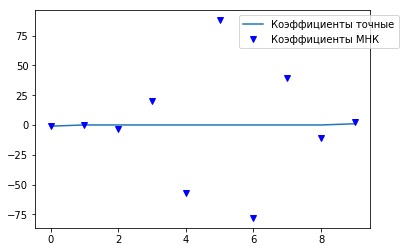

In [83]:
plt.plot (coefs,label="Коэффициенты точные")
plt.plot (PolynomCoefs, 'bv',label="Коэффициенты МНК")
plt.legend(bbox_to_anchor=(1.1, 1))
plt.show()

## МНК с регулизацией

63678373.62226404


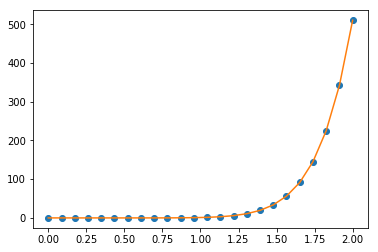

510.98334147834674 510.98552320561646


In [84]:
CoefsReg = SqLeast(x_array, y_array, m, 0.01)
#print ('Коэффициенты МНК с регуляризацией', CoefsReg)
cond = np.linalg.cond (G)
print (cond)
PolynomValue=np.sum(np.array([ CoefsReg[i]*x_array**i for i in range(0,m)]), axis=0)
#plt.plot (x, PolynomValue)
plt.plot (x_array, y_array, 'o')
plt.plot (x_array, PolynomValue)
plt.show()
print(PolynomValue[-1], y_array[-1])

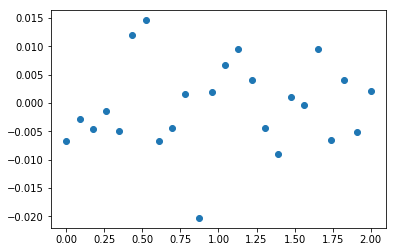

0.007571289010866364


In [85]:
ResLocal, SE, SErel, R2=AppError(x_array, y_array,CoefsReg )
plt.plot(x_array, ResLocal,'o')
plt.show()
print(SE)

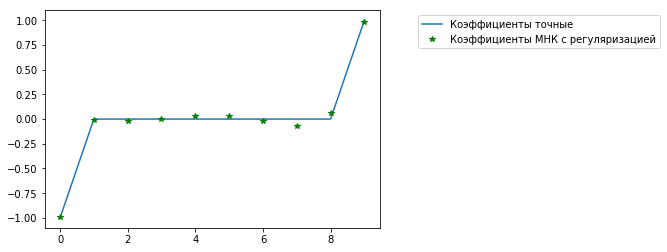

0.9853694079326358 1.0
-0.9914858457490028 -1.0


In [86]:
plt.plot (coefs,label="Коэффициенты точные")
plt.plot (CoefsReg, 'g*',label="Коэффициенты МНК с регуляризацией")
plt.legend(bbox_to_anchor=(1.1, 1))
plt.show()
print(CoefsReg[-1],  coefs[-1])
print(CoefsReg[0],  coefs[0])

## МНК с SVD

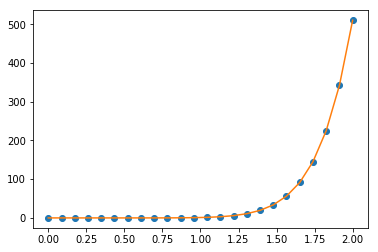

510.98367884272056 510.98552320561646


In [87]:
PhiInv = np.linalg.pinv(Phi, rcond = 1e-5)
CoefsSVD = PhiInv @ y_array
#print ('коэффициенты МНК SVD', CoefsSVD )
PolynomValue=np.sum(np.array([ CoefsSVD[i]*x_array**i for i in range(0,m)]), axis=0)
plt.plot (x_array, y_array, 'o')
plt.plot (x_array, PolynomValue)
plt.show()
print(PolynomValue[-1],  y_array[-1])

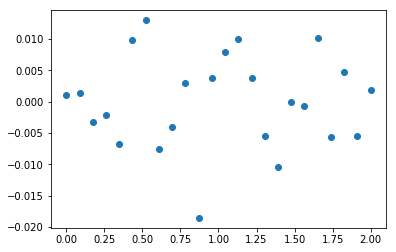

0.0072714015770457205


In [88]:
ResLocal, SE, SErel, R2=AppError(x_array, y_array,CoefsSVD  )
plt.plot(x_array, ResLocal,'o')
plt.show()
print(SE)

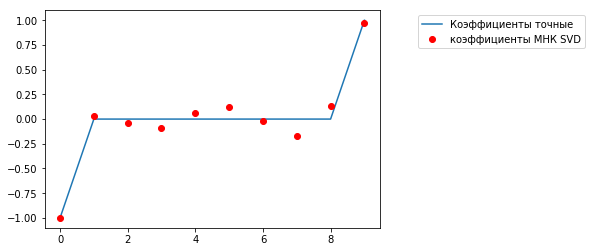

0.9736172848292597 1.0


In [89]:
plt.plot (coefs,label="Коэффициенты точные")
plt.plot (CoefsSVD, 'ro',label="коэффициенты МНК SVD")
plt.legend(bbox_to_anchor=(1.1, 1))
plt.show()
print(CoefsSVD[-1],coefs[-1])

## Графики

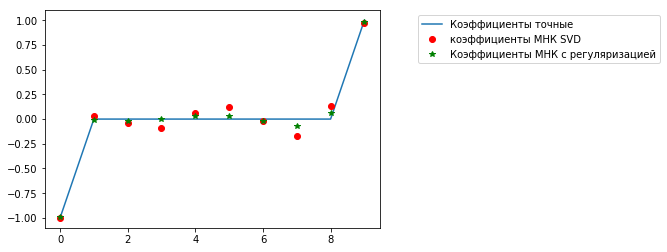

In [94]:
plt.plot (coefs,label="Коэффициенты точные")
plt.plot (CoefsSVD, 'ro',label="коэффициенты МНК SVD")
plt.plot (CoefsReg, 'g*',label="Коэффициенты МНК с регуляризацией")
#plt.plot (PolynomCoefs, 'bv',label="Коэффициенты МНК")

plt.legend(bbox_to_anchor=(1.1, 1))
plt.show()

